In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

ticker = "TSLA"
df = pd.read_csv(f"../Data/Global_Data_{ticker}.csv")
df

,Date,Open,High,Low,Close,Volume,SMA_50,SMA_200,RSI,MACD,MACD_signal,average_sentiment,weighted_sentiment,dominant_sentiment,average_score,tweet_count,sentiment_momentum
0,2016-10-18,0.079890,0.079890,0.058824,0.065247,0.111045,0.102020,0.004886,0.307258,0.377428,0.368171,-1.000000,-1.000000,Negative,0.796722,2.0,-1.000000
1,2016-10-19,0.097591,0.097591,0.087517,0.084496,0.152703,0.098439,0.004010,0.408188,0.382467,0.365870,0.000000,-0.249294,Negative,0.684881,2.0,1.000000
2,2016-10-20,0.079890,0.079890,0.072911,0.080446,0.091733,0.094985,0.003254,0.391519,0.385362,0.364697,1.000000,1.000000,Positive,0.840087,1.0,1.000000
3,2016-10-21,0.083819,0.083819,0.067204,0.081890,0.024050,0.091729,0.002605,0.399131,0.388928,0.364583,0.000000,0.000000,Neutral,0.000000,0.0,-1.000000
4,2016-10-24,0.094416,0.094416,0.076702,0.093279,0.017954,0.088749,0.002185,0.458094,0.397300,0.366425,0.333333,0.328422,Neutral,0.767217,3.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,2019-12-23,0.953486,0.953486,0.946923,0.934432,0.353841,0.842281,0.383346,0.946618,0.888926,0.802308,-0.168889,-0.210256,Negative,0.834740,225.0,-0.060556
801,2019-12-24,0.977418,0.977418,0.960731,0.945220,0.186505,0.863020,0.388602,0.952967,0.924306,0.838322,-0.267857,-0.331700,Negative,0.844791,112.0,-0.098968
802,2019-12-26,1.000000,1.000000,0.992697,1.000000,0.268480,0.884593,0.394338,0.981619,0.970343,0.877765,-0.158416,-0.213673,Negative,0.850076,101.0,0.109441
803,2019-12-27,0.997777,0.997777,1.000000,0.999038,0.246607,0.905786,0.399841,0.978268,1.000000,0.916169,-0.238532,-0.291217,Negative,0.853422,109.0,-0.080116


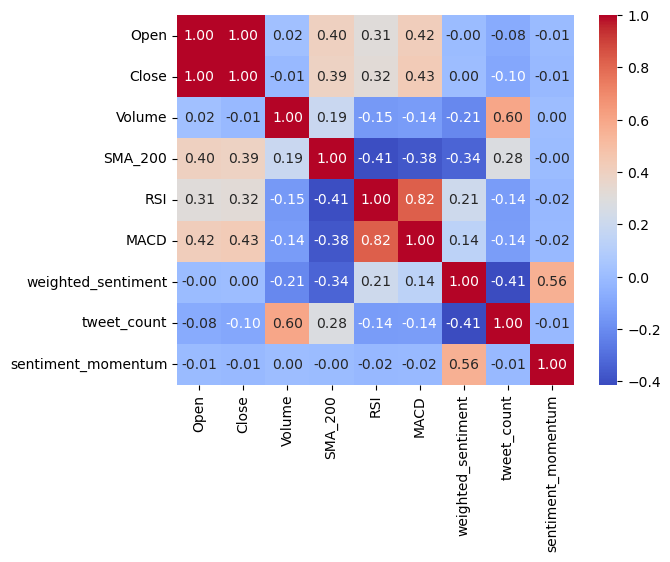

In [40]:
# Convertir la columna 'Date' a tipo de dato datetime (si no lo está ya)
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna 'Date' como índice
df.set_index('Date', inplace=True)

# Seleccionar las columnas numéricas que te interesan
columnas_seleccionadas = ['Open','Close','Volume','SMA_200', 'RSI', 'MACD', 'weighted_sentiment', 'tweet_count', 'sentiment_momentum']
df_seleccionado = df[columnas_seleccionadas]

# Crear el heatmap de correlación
sns.heatmap(df_seleccionado.corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Mostrar el heatmap
plt.show()


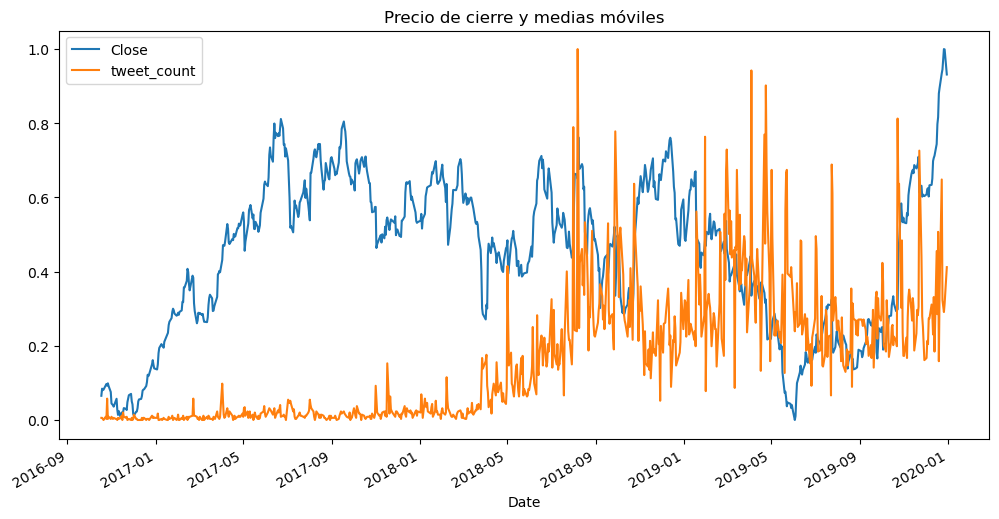

In [41]:
# Escalar las variables seleccionadas
scaler = MinMaxScaler()
df_seleccionado_scaled = scaler.fit_transform(df_seleccionado)

# Convertir el resultado escalado de nuevo en DataFrame
df = pd.DataFrame(df_seleccionado_scaled, columns=df_seleccionado.columns, index=df_seleccionado.index)


# Gráfico de series temporales
df[['Close', 'tweet_count']].plot(figsize=(12,6))
plt.title('Precio de cierre y medias móviles')
plt.show()

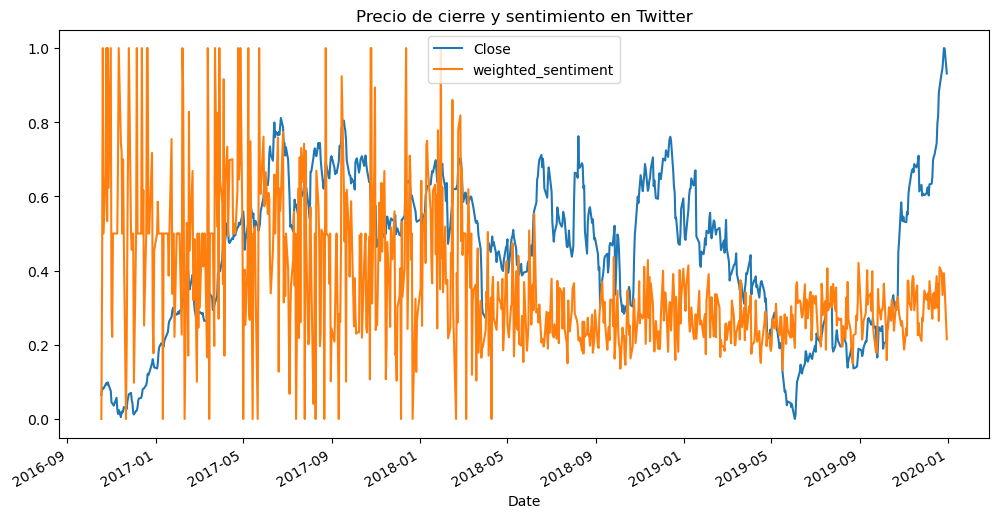

In [47]:
# Gráfico de series temporales
df[['Close', 'weighted_sentiment']].plot(figsize=(12,6))
plt.title('Precio de cierre y sentimiento en Twitter')
plt.show()

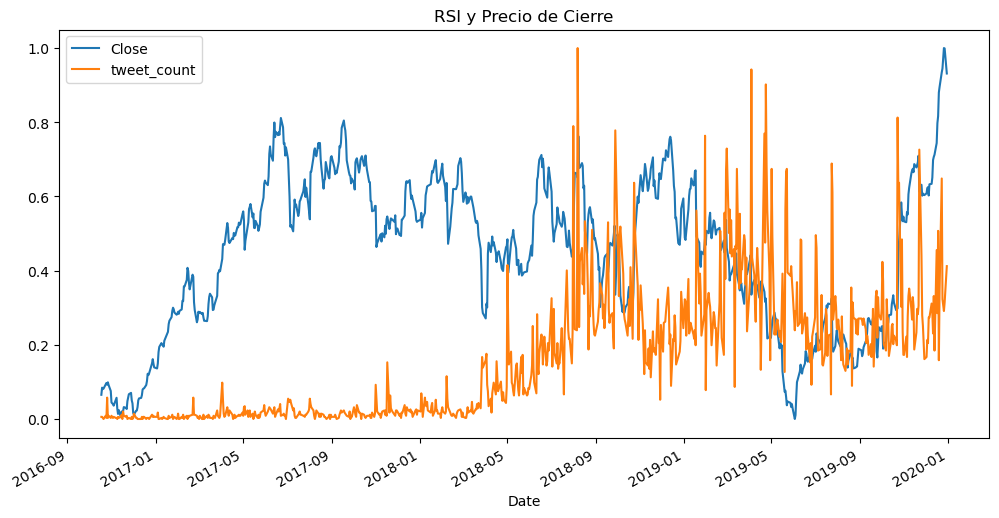

In [48]:
# Comparación de RSI y precios de cierre
df[['Close', 'tweet_count']].plot(figsize=(12,6))
plt.title('RSI y Precio de Cierre')
plt.show()


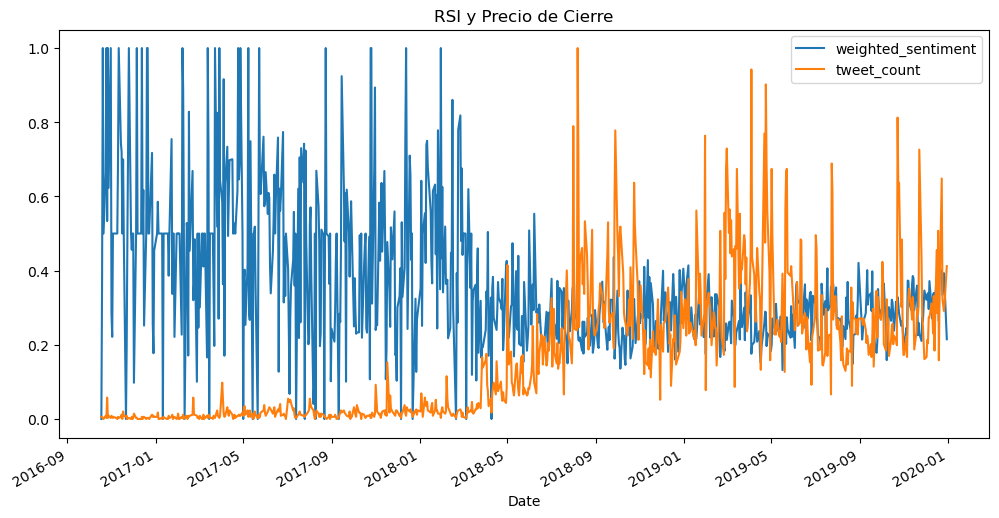

In [49]:
# Comparación de RSI y precios de cierre
df[['weighted_sentiment', 'tweet_count']].plot(figsize=(12,6))
plt.title('RSI y Precio de Cierre')
plt.show()